In [1]:
import numpy as np
import pandas as pd
import googlemaps

In [2]:
crime_anal_police = pd.read_csv('02._crime_in_Seoul.csv', thousands=',', encoding='euc-kr')
crime_anal_police.tail()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
26,노원서,4,3,3,3,169,148,1404,646,2163,1781
27,방배서,1,1,1,1,63,50,348,159,423,365
28,은평서,1,1,1,1,95,74,839,434,1092,956
29,도봉서,0,0,2,2,82,87,861,379,1234,1022
30,수서서,1,2,2,1,195,194,1010,475,1394,1200


In [3]:
crime_anal_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [4]:
gmaps = googlemaps.Client(key='----')

In [5]:
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 수표로 27',
  'geometry': {'location': {'lat': 37.56361709999999, 'lng': 126.9896517},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5649660802915,
     'lng': 126.9910006802915},
    'southwest': {'lat': 37.5622681197085, 'lng': 126.9883027197085}}},
  'partial_match': True,
  'place_id': 'ChIJc-9q5uSifDURLhQmr5wkXmc',
 

In [6]:
station_name = []

for name in crime_anal_police['관서명']:
    station_name.append('서울' + str(name[:-1] + '경찰서'))
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

#### 서울영등포경찰서의 경우
> gmaps.geocode 로 검색이 되지 않아 직접 주소, 위도, 경도 찾아서 추가함

In [7]:
station_address, station_lat, station_lng = [], [], []

for name in station_name:
    if name != '서울영등포경찰서':
        tmp = gmaps.geocode(name, language='ko')
        station_address.append(tmp[0].get('formatted_address'))

        tmp_loc = tmp[0].get('geometry')
        station_lat.append(tmp_loc['location']['lat'])
        station_lng.append(tmp_loc['location']['lng'])
        print(name + '-->' + tmp[0].get('formatted_address'))

서울중부경찰서-->대한민국 서울특별시 중구 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서-->대한민국 서울특별시 중구 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 백범로 329
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서-->대한민국 서울특별시 동대문구 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 마포대로 183
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 녹번동 177-15
서울강북경찰서-->대한민국 서울특별시 강북구 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥대로73길 50
서울중랑경찰서-->대한민국 서울특별시 중랑구 묵2동 249-2
서울강남경찰서-->대한민국 서울특별시 강남구 테헤란로114길 11
서울관악경찰서-->대한민국 서울특별시 관악구 관악로5길 33
서울강서경찰서-->대한민국 서울특별시 강서구 화곡6동 980-27
서울강동경찰서-->대한민국 서울특별시 강동구 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 종암로 135
서울구로경찰서-->대한민국 서울특별시 구로구 가마산로 235
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 중대로 221
서울노원경찰서-->대한민국 서울특별시 노원구 하계동 노원로 283
서울방배경찰서-->대한민국 서울특별시 서초구 동작대로 204
서울은평경찰서-->대한민국 서울특별시 은평구 불광동 연서로 365
서울도

In [8]:
station_address.insert(9, '대한민국 서울특별시 영등포구 당산동3가 국회대로 608')
station_lat.insert(9, 37.52608398868042)
station_lng.insert(9, 126.90081132987066)
station_address

['대한민국 서울특별시 중구 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 한강대로 410',
 '대한민국 서울특별시 서대문구 통일로 113',
 '대한민국 서울특별시 종로구 인의동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 백범로 329',
 '대한민국 서울특별시 성북구 삼선동 보문로 170',
 '대한민국 서울특별시 동대문구 약령시로21길 29',
 '대한민국 서울특별시 마포구 마포대로 183',
 '대한민국 서울특별시 영등포구 당산동3가 국회대로 608',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 녹번동 177-15',
 '대한민국 서울특별시 강북구 오패산로 406',
 '대한민국 서울특별시 금천구 시흥대로73길 50',
 '대한민국 서울특별시 중랑구 묵2동 249-2',
 '대한민국 서울특별시 강남구 테헤란로114길 11',
 '대한민국 서울특별시 관악구 관악로5길 33',
 '대한민국 서울특별시 강서구 화곡6동 980-27',
 '대한민국 서울특별시 강동구 성내로 57',
 '대한민국 서울특별시 성북구 종암로 135',
 '대한민국 서울특별시 구로구 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 목동동로 99',
 '대한민국 서울특별시 송파구 중대로 221',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 동작대로 204',
 '대한민국 서울특별시 은평구 불광동 연서로 365',
 '대한민국 서울특별시 도봉구 노해로 403',
 '대한민국 서울특별시 강남구 개포로 617']

In [9]:
gu_name = []

for name in station_address:
    tmp = name.split()
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    gu_name.append(tmp_gu)

crime_anal_police['구별'] = gu_name
crime_anal_police.tail()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
26,노원서,4,3,3,3,169,148,1404,646,2163,1781,노원구
27,방배서,1,1,1,1,63,50,348,159,423,365,서초구
28,은평서,1,1,1,1,95,74,839,434,1092,956,은평구
29,도봉서,0,0,2,2,82,87,861,379,1234,1022,도봉구
30,수서서,1,2,2,1,195,194,1010,475,1394,1200,강남구


In [10]:
crime_anal = pd.pivot_table(crime_anal_police, index='구별', aggfunc=np.sum)
crime_anal.tail()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
용산구,186,230,6,6,3,5,534,1111,1327,1617
은평구,145,171,3,4,4,4,756,1371,1623,1840
종로구,146,192,7,7,6,9,594,1183,1420,1711
중구,128,186,6,5,2,2,863,1642,1324,1576
중랑구,153,183,6,5,9,10,889,1506,1724,2022


In [11]:
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

crime_anal.drop(['강간 검거', '강도 검거', '살인 검거', '절도 검거', '폭력 검거'], axis=1, inplace=True)
crime_anal

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255,4,2,1664,1676,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197,5,6,1763,2204,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117,7,4,999,1471,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169,3,4,1404,2163,87.573964,100.000000,75.000000,46.011396,82.339344


In [12]:
crime_anal.rename(columns = {'강간 발생': '강간', '강도 발생': '강도', '살인 발생': '살인', '절도 발생': '절도',
                             '폭력 발생': '폭력'}, inplace=True)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
a = crime_anal.iloc[:,0:5]
b = crime_anal.iloc[:,5:]
scaler = MinMaxScaler()

In [15]:
a_scaled = scaler.fit_transform(a)

In [16]:
temp = pd.DataFrame(a_scaled, columns = ['강간', '강도', '살인', '절도', '폭력'], index=crime_anal.index)
temp

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000
강동구,0.169329,1.000000,0.250000,0.396131,0.292991
강북구,0.123003,0.285714,0.750000,0.000000,0.242054
강서구,0.292332,0.357143,0.833333,0.418701,0.497963
관악구,0.512780,0.142857,1.000000,0.667434,0.566830
광진구,0.276358,0.214286,0.166667,0.407186,0.184597
구로구,0.183706,0.285714,0.500000,0.452787,0.399756
금천구,0.055911,0.428571,0.333333,0.100875,0.101059
노원구,0.138978,0.142857,0.333333,0.287425,0.383048


In [17]:
crime_anal_norm = pd.merge(temp, b, on='구별')
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,0.169329,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,0.123003,0.285714,0.750000,0.000000,0.242054,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,0.292332,0.357143,0.833333,0.418701,0.497963,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,0.512780,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.000000,51.009421,90.091813


In [18]:
crime_anal_norm.fillna(crime_anal_norm['살인검거율'].mean(), inplace=True)

In [19]:
result_cctv = pd.read_csv('서울시CCTV설치운영현황(자치구)_년도별_210731기준.csv', encoding='euc-kr',
                          index_col='구분')
crime_anal_norm[['인구수', 'CCTV']] = result_cctv[['총계', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,"6,502",3479.0
강동구,0.169329,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.000000,47.621951,87.384140,"2,547",1620.0
강북구,0.123003,0.285714,0.750000,0.000000,0.242054,83.018868,80.000000,88.888889,62.820513,89.433132,"2,462",2025.0
강서구,0.292332,0.357143,0.833333,0.418701,0.497963,83.773585,83.333333,90.000000,63.351095,85.357873,"2,560",1701.0
관악구,0.512780,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.000000,51.009421,90.091813,"4,942",2355.0


In [20]:
crime_anal_norm['범죄'] = np.sum(crime_anal_norm.iloc[:,0:5], axis=1)
crime_anal_norm['검거'] = np.sum(crime_anal_norm.iloc[:,5:], axis=1)

D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


In [21]:
crime_anal_norm.tail()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
용산구,0.236422,0.357143,0.416667,0.152464,0.160554,80.869565,100.0,60.000000,48.064806,82.065553,"2,383",1400.0,1.323250,1772.323175
은평구,0.142173,0.214286,0.333333,0.272225,0.251426,84.795322,75.0,100.000000,55.142232,88.206522,"3,791",2514.0,1.213443,2918.357518
종로구,0.175719,0.428571,0.750000,0.185629,0.198859,76.041667,100.0,66.666667,50.211327,82.992402,"1,772",598.0,1.738778,975.650841
중구,0.166134,0.285714,0.166667,0.397052,0.143847,68.817204,120.0,100.000000,52.557856,84.010152,NaN,NaN,1.159414,426.544627
중랑구,0.161342,0.285714,0.833333,0.334408,0.325591,83.606557,120.0,90.000000,59.030544,85.262117,"3,296",2327.0,1.940388,2766.839607


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

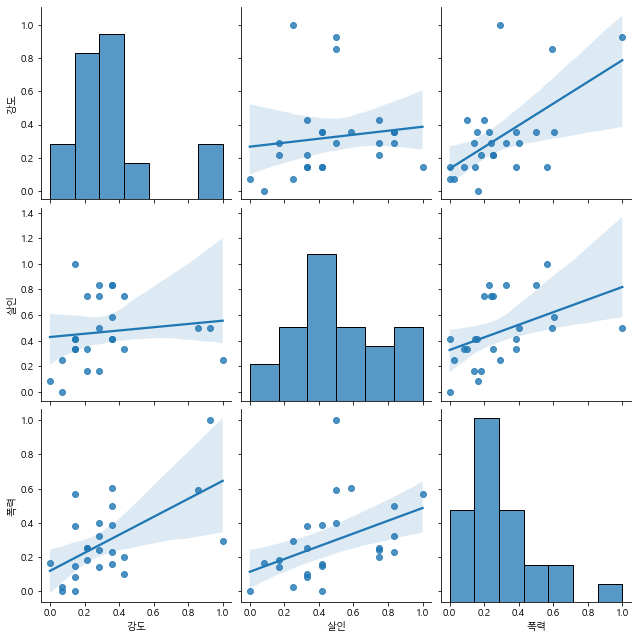

In [24]:
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', height=3)
plt.show()

In [26]:
import folium, json

In [27]:
geo_path = '02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [29]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_anal_norm['살인'], columns = [crime_anal_norm.index, crime_anal_norm['살인']],
              fill_color = 'PuRd', key_on = 'feature.id')
map

### 살인 건수에서 강남 3구가 안전하다고 보기 어렵다

In [31]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_anal_norm['강간'], columns = [crime_anal_norm.index, crime_anal_norm['강간']],
              fill_color = 'PuRd', key_on = 'feature.id')
map